# competitiveness-gd-xgd

Using goal difference variance to measure a league's competitiveness.

In [6]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy import stats
import csv
from matplotlib.pyplot import figure

#read csv files --- data from fbref
epl_df = pd.read_csv (r'epl.csv')
seriea_df = pd.read_csv (r'seriea.csv')
ligue1_df = pd.read_csv (r'ligue1.csv')
bundesliga_df = pd.read_csv (r'bundesliga.csv')
laliga_df = pd.read_csv (r'laliga.csv')
fawsl_df = pd.read_csv (r'fawsl.csv')

### xGD & GD Correlation

In [26]:
x=[]
y=[]

x = epl_df['xGD'].tolist()
y = epl_df['GD'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
r = round(r, 3)
print("Premier League Correlation Coefficient:", r)

x=[]
y=[]

x = laliga_df['xGD'].tolist()
y = laliga_df['GD'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
r = round(r, 3)
print("La Liga Correlation Coefficient:", r)

x=[]
y=[]

x = seriea_df['xGD'].tolist()
y = seriea_df['GD'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
r = round(r, 3)
print("Serie A Correlation Coefficient:", r)

x=[]
y=[]

x = bundesliga_df['xGD'].tolist()
y = bundesliga_df['GD'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

r = round(r, 3)
print("Bundesliga Correlation Coefficient:", r)

x=[]
y=[]

x = ligue1_df['xGD'].tolist()
y = ligue1_df['GD'].tolist()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
r = round(r, 3)
print("Ligue 1 Correlation Coefficient:", r)

Premier League Correlation Coefficient: 0.94
La Liga Correlation Coefficient: 0.908
Serie A Correlation Coefficient: 0.934
Bundesliga Correlation Coefficient: 0.94
Ligue 1 Correlation Coefficient: 0.907


### Expected Goals Under/Over Performance

In [9]:
top_5 = [epl_df, seriea_df, laliga_df, bundesliga_df, ligue1_df]
  
top_5_df = pd.concat(top_5)
top_5_df['xgg'] = top_5_df.GF - top_5_df.xG

print(top_5_df.sort_values(by=['xgg']))

    Season          Squad  GF  GA  GD  Pts    xG   xGA   xGD   xgg
70    1718       Sassuolo  29  59 -30   43  49.4  49.3   0.1 -20.4
75    1718           Caen  27  52 -25   38  42.2  48.7  -6.6 -15.2
17    2021         Fulham  27  53 -26   28  41.3  52.9 -11.7 -14.3
46    1819           Nice  30  35  -5   56  44.2  49.0  -4.8 -14.2
78    1718     Las Palmas  24  74 -50   22  38.0  65.2 -27.3 -14.0
..     ...            ...  ..  ..  ..  ...   ...   ...   ...   ...
0     2021  Bayern Munich  99  44  55   78  75.8  41.0  34.8  23.2
61    1718         Monaco  85  45  40   80  61.5  47.0  14.5  23.5
19    1920       Dortmund  84  41  43   69  59.2  39.4  19.8  24.8
64    1718          Lazio  89  49  40   72  63.5  44.4  19.0  25.5
60    1718       Juventus  86  24  62   95  59.8  28.7  31.0  26.2

[392 rows x 10 columns]


### Big 5 Leagues: Variance by Season

In [35]:
epl_2021_df = epl_df[(epl_df.Season == 2021)]
epl_2021_var = epl_2021_df.loc[:,"GD"].var()

epl_1920_df = epl_df[(epl_df.Season == 1920)]
epl_1920_var = epl_1920_df.loc[:,"GD"].var()

epl_1819_df = epl_df[(epl_df.Season == 1819)]
epl_1819_var = epl_1819_df.loc[:,"GD"].var()

epl_1718_df = epl_df[(epl_df.Season == 1718)]
epl_1718_var = epl_1718_df.loc[:,"GD"].var()
                     
epl_var = [epl_1718_var, epl_1819_var, epl_1920_var, epl_2021_var]

seriea_2021_df = seriea_df[(seriea_df.Season == 2021)]
seriea_2021_var = seriea_2021_df.loc[:,"GD"].var()

seriea_1920_df = seriea_df[(seriea_df.Season == 1920)]
seriea_1920_var = seriea_1920_df.loc[:,"GD"].var()

seriea_1819_df = seriea_df[(seriea_df.Season == 1819)]
seriea_1819_var = seriea_1819_df.loc[:,"GD"].var()

seriea_1718_df = seriea_df[(seriea_df.Season == 1718)]
seriea_1718_var = seriea_1718_df.loc[:,"GD"].var()
                     
seriea_var = [seriea_1718_var, seriea_1819_var, seriea_1920_var, seriea_2021_var]

laliga_2021_df = laliga_df[(laliga_df.Season == 2021)]
laliga_2021_var = laliga_2021_df.loc[:,"GD"].var()

laliga_1920_df = laliga_df[(laliga_df.Season == 1920)]
laliga_1920_var = laliga_1920_df.loc[:,"GD"].var()

laliga_1819_df = laliga_df[(laliga_df.Season == 1819)]
laliga_1819_var = laliga_1819_df.loc[:,"GD"].var()

laliga_1718_df = laliga_df[(laliga_df.Season == 1718)]
laliga_1718_var = laliga_1718_df.loc[:,"GD"].var()
                     
laliga_var = [laliga_1718_var, laliga_1819_var, laliga_1920_var, laliga_2021_var]

bundesliga_2021_df = bundesliga_df[(bundesliga_df.Season == 2021)]
bundesliga_2021_var = bundesliga_2021_df.loc[:,"GD"].var()

bundesliga_1920_df = bundesliga_df[(bundesliga_df.Season == 1920)]
bundesliga_1920_var = bundesliga_1920_df.loc[:,"GD"].var()

bundesliga_1819_df = bundesliga_df[(bundesliga_df.Season == 1819)]
bundesliga_1819_var = bundesliga_1819_df.loc[:,"GD"].var()

bundesliga_1718_df = bundesliga_df[(bundesliga_df.Season == 1718)]
bundesliga_1718_var = bundesliga_1718_df.loc[:,"GD"].var()
                     
bundesliga_var = [bundesliga_1718_var, bundesliga_1819_var, bundesliga_1920_var, bundesliga_2021_var]

ligue1_2021_df = ligue1_df[(ligue1_df.Season == 2021)]
ligue1_2021_var = ligue1_2021_df.loc[:,"GD"].var()

ligue1_1920_df = ligue1_df[(ligue1_df.Season == 1920)]
ligue1_1920_var = ligue1_1920_df.loc[:,"GD"].var()

ligue1_1819_df = ligue1_df[(ligue1_df.Season == 1819)]
ligue1_1819_var = ligue1_1819_df.loc[:,"GD"].var()

ligue1_1718_df = ligue1_df[(ligue1_df.Season == 1718)]
ligue1_1718_var = ligue1_1718_df.loc[:,"GD"].var()
                     
ligue1_var = [ligue1_1718_var, ligue1_1819_var, ligue1_1920_var, ligue1_2021_var]

barWidth = 0.1
r1 = np.arange(len(epl_var))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(10,8))
plt.bar(r1, epl_var, color='cyan', width=barWidth, edgecolor='white', label='Premier League')
plt.bar(r2, seriea_var, color='magenta', width=barWidth, edgecolor='white', label='Serie A')
plt.bar(r3, laliga_var, color='yellow', width=barWidth, edgecolor='white', label='La Liga')
plt.bar(r4, bundesliga_var, color='gray', width=barWidth, edgecolor='white', label='Bundesliga')
plt.bar(r5, ligue1_var, color='#39FF14', width=barWidth, edgecolor='white', label='Ligue 1')
plt.xlabel('Season')
plt.ylabel('GD Variance')
plt.title('GD Variance by Season')
plt.xticks(np.arange(4), ['2017/18', '2018/19', '2019/20', '2020/21'], rotation=90)
 
plt.legend()
plt.show()

### EPL & FAWSL: Variance

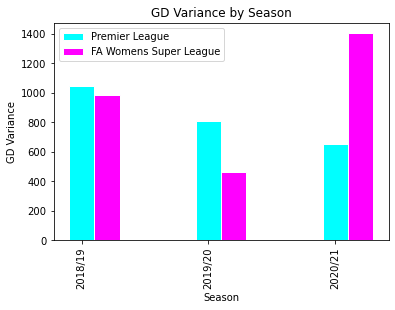

In [39]:
epl_var_1 = [epl_1819_var, epl_1920_var, epl_2021_var]

fawsl_2021_df = fawsl_df[(fawsl_df.Season == 2021)]
fawsl_2021_var = fawsl_2021_df.loc[:,"GD"].var()

fawsl_1920_df = fawsl_df[(fawsl_df.Season == 1920)]
fawsl_1920_var = fawsl_1920_df.loc[:,"GD"].var()

fawsl_1819_df = fawsl_df[(fawsl_df.Season == 1819)]
fawsl_1819_var = fawsl_1819_df.loc[:,"GD"].var()
                     
fawsl_var = [fawsl_1819_var, fawsl_1920_var, fawsl_2021_var]

barWidth = 0.2
r1 = np.arange(len(epl_var_1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, epl_var_1, color='cyan', width=barWidth, edgecolor='white', label='Premier League')
plt.bar(r2, fawsl_var, color='magenta', width=barWidth, edgecolor='white', label='FA Womens Super League')
plt.xlabel('Season')
plt.ylabel('GD Variance')
plt.title('GD Variance by Season')
plt.xticks(np.arange(3), ['2018/19', '2019/20', '2020/21'], rotation=90)
 
plt.legend()
plt.show()

Text(0.5, 0.98, '')

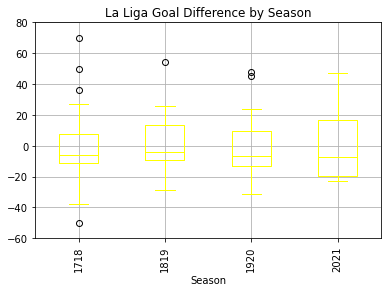

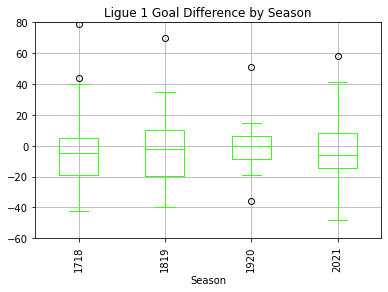

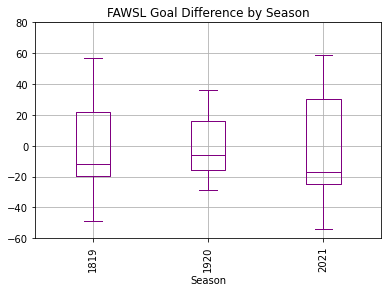

In [36]:
epl_df.boxplot(column='GD',
                  by='Season',
                  color='cyan',
                rot=90)
plt.ylim([-60, 80])
plt.title("Premier League Goal Difference by Season")
plt.suptitle('')

laliga_df.boxplot(column='GD',
                  by='Season',
                  color='yellow',
                rot=90)
plt.ylim([-60, 80])
plt.title("La Liga Goal Difference by Season")
plt.suptitle('')

seriea_df.boxplot(column='GD',
                  by='Season',
                  color='magenta',
                rot=90)
plt.ylim([-60, 80])
plt.title("Serie A Goal Difference by Season")
plt.suptitle('')

bundesliga_df.boxplot(column='GD',
                  by='Season',
                  color='gray',
                rot=90)
plt.ylim([-60, 80])
plt.title("Bundesliga Goal Difference by Season")
plt.suptitle('')

ligue1_df.boxplot(column='GD',
                  by='Season',
                  color='#39FF14',
                rot=90)
plt.ylim([-60, 80])
plt.title("Ligue 1 Goal Difference by Season")
plt.suptitle('')

fawsl_df.boxplot(column='GD',
                  by='Season',
                  color='purple',
                rot=90)
plt.ylim([-60, 80])
plt.title("FAWSL Goal Difference by Season")
plt.suptitle('')

### Goal Difference Over Time by Club

In [37]:
mancity_df = epl_df[(epl_df.Squad == "Manchester City")]
manunited_df = epl_df[(epl_df.Squad == "Manchester Utd")]
liverpool_df = epl_df[(epl_df.Squad == "Liverpool")]
chelsea_df = epl_df[(epl_df.Squad == "Chelsea")]
spurs_df = epl_df[(epl_df.Squad == "Tottenham")]
plt.figure(figsize=(10,8))
plt.plot(mancity_df.Season, mancity_df.GD, color = "#6CABDD", label = "Manchester City")
plt.plot(manunited_df.Season, manunited_df.GD, color = "Green", label = "Manchester United")
plt.plot(spurs_df.Season, spurs_df.GD, color = "Grey", label = "Tottenham Hotspur")
plt.plot(chelsea_df.Season, chelsea_df.GD, color = "blue", label = "Chelsea")
plt.plot(liverpool_df.Season, liverpool_df.GD, color = "red", label = "Liverpool")
plt.xlabel('Season')
plt.xticks([1718, 1819, 1920, 2021])
plt.ylabel('Goal Difference')
plt.title('Premier League Goal Difference by Season')
plt.legend()
plt.show()

In [41]:
barca_df = laliga_df[(laliga_df.Squad == "Barcelona")]
atleti_df = laliga_df[(laliga_df.Squad == "Atlético Madrid")]
real_df = laliga_df[(laliga_df.Squad == "Real Madrid")]
sevilla_df = laliga_df[(laliga_df.Squad == "Sevilla")]
valencia_df = laliga_df[(laliga_df.Squad == "Valencia")]
plt.figure(figsize=(10,8))
plt.plot(barca_df.Season, barca_df.GD, color = "blue", label = "Barcelona")
plt.plot(atleti_df.Season, atleti_df.GD, color = "red", label = "Atlético Madrid")
plt.plot(real_df.Season, real_df.GD, color = "Gold", label = "Real Madrid")
plt.plot(sevilla_df.Season, sevilla_df.GD, color = "grey", label = "Sevilla")
plt.plot(valencia_df.Season, valencia_df.GD, color = "orange", label = "Valencia")
plt.xlabel('Season')
plt.xticks([1718, 1819, 1920, 2021])
plt.ylabel('Goal Difference')
plt.title('La Liga Goal Difference by Season')
plt.legend()
plt.show()